# Training Models
See https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb.

## Linear Regression
### The Normal Equation
page 108<br>
A straightforward derivation of the Normal Equation can be found under the following link (from caption to first subsection): https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics)#Derivation_of_the_normal_equations.

In [1]:
# Use some default code (taken from the Github link above) that will be useful throughout this notebook.
# to make this notebook's output stable across runs
import numpy as np
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

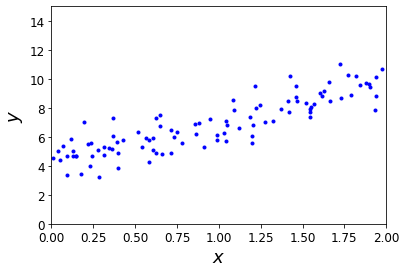

In [2]:
X = 2 * np.random.rand(100,1)          # 100 random numbers between 0 and 2
y = 4 + 3 * X + np.random.randn(100,1) # quadratic function and added random noise (normally distributed)
plt.plot(X, y, "b.")                   # plot blue dots
plt.xlabel("$x$", fontsize = 18)       # specify the x-label
plt.ylabel("$y$", fontsize = 18)       # specify the y-label
plt.axis([0, 2, 0, 15])                # specify the range of the axes
plt.show()

The Normal Equation, $\theta=(X^T\cdot X)^{-1}\cdot X^T\cdot y$, is explained under the link above and on pages 107/108 of the book.

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # calculate the above formula
theta_best

array([[4.21509616],
       [2.77011339]])

This result needs to be compared to our choice of $\theta_0=4$ and $\theta_1=3$. The deviation is because of the noise. Now, this result can be used to make predictions.

In [4]:
X_new = np.array([[0], [2]])            # two new instances (only one x-value for each instance)
print(X_new)
X_new_b = np.c_[np.ones((2, 1)), X_new] # adding the default 1 for each instance
print(X_new_b)
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[0]
 [2]]
[[1. 0.]
 [1. 2.]]
[[4.21509616]
 [9.75532293]]


Let's plot the predicitons obtained from our best fit based on the Normal Equation.

<function matplotlib.pyplot.show(*args, **kw)>

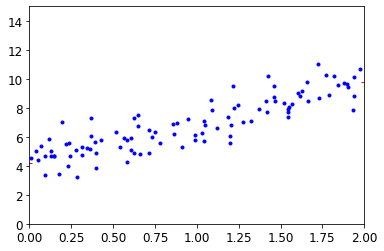

In [5]:
plt.plot(X_new, y_predict, "r_")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show

Note that we coded everything ourselves! Of course, there is also a Scikit-Learn version for this. Let's try it out!

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(X_new) # note that we do not need to enter the 1s automatically - Scikit-Learn take care of this

[4.21509616] [[2.77011339]]


array([[4.21509616],
       [9.75532293]])

As expected for an analytical model like the Normal Equation, the same input leads to the same output: the results using the Scikit-Learn version are the same as those produced by our own code above.
### Computational Complexity
page 110<br><br>
!!!<br>
The Normal Equation relies on the matrix inverse of $X^T\cdot X$ and thus has computational complexity of $O(n^{2.4})$ to $O(n^{3})$. As a consequence it becomes rather inefficient when the number of features gets large, e.g. 100000. On the other hand, computation time scales linearly with the number of instances for training, so large training sets can be handled efficiently. Moreover, it also scales linearly with the number of instances to predict and with the number of features to predict. In short, training may be slow if there are a lot of features but inference/prediction will be fast.
## Gradient Descent
page 111<br>
Gradient descent start with a random inital set of model parameter. For this set, the gradient of the cost function is calculated. Then, a step is taken downward the slope. The idea is that by repeating this procedure, the global minimum will be reached. However, there are several pitfalls like plateaus (gradient is zero) and local minima (gradient is also zero). Moreover, the step size is important. If it is too small, the procedure can take a long time. If it is too large, one might jump from a point close to the global minimum to another point even further from the minimum. Therefore, the step size, or *learning rate*, usually has a large initial value and the decreases more and more.<br>
<br>
Using equal scaling for all features helps making the convergence of gradient descent fast. A similar scale can be obtained, e.g., with Scikit-Learn's *StandardScaler* class.
### Batch Gradient Descent
page 114<br>
The mean square error and its gradient are given by
$${\rm MSE}(X)=\frac{1}{m}\sum_{i=1}^m\left(\theta^T\cdot x^{(i)}-y^{(i)}\right)^2\,,\quad\frac{\partial}{\partial\theta_j}{\rm MSE}(\theta)=\frac{2}{m}\sum_{i=1}^m\left(\theta^T\cdot x^{(i)}-y^{(i)}\right)x_j^{(i)}\,.$$ Calculating the derivative for each $\theta_j$ in this way, the gradient can be written as $\nabla_{\theta}{\rm MSE}(\theta)=(2/m)X^T\cdot(X\cdot\theta-y)$, where the bracket is simply a list where each element corresponds to an instance as shown above. To obtain the j-th component of the gradient this is preceded by the transpose matrix $X^T$, so the list has the appropriate ordering the scalar product between the $X^T$ and the bracket restores the summation over instances $i$.<br><br>
Notice that this formula involves calculations over the full training set $X$, at each gradient descent step! This is why the algorithm is called *Batch Gradient Descent*: it uses the whole batch of trainng data at every step. As a result it is terribly slow on very large training sets (but we will see much faster gradient descent algorithms shortly). However, gradient descent scales well with the number of features; trainng a linear regression model when there are hundreds of thousands of features is much faster using gradient descent than using the Normal Equation.
<br><br>
When the gradient is obtained, we go a step in the opposite direction the gradient is pointing. This is where the step size $\eta$ comes in:
$$\theta^{\text{(next step)}}=\theta-\eta\nabla_{\theta}{\rm MSE}(\theta)\,.$$
Now, let's code this!

In [7]:
eta = 0.1                       # step size = learning rate (here the learning rate is constant)
n_iterations = 1000             # number of steps
m = 100                         # number of instances (see second code cell)
theta = np.random.randn(2,1)    # random initialization of the two model parameters
print(theta)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
print(theta)

[[0.01300189]
 [1.45353408]]
[[4.21509616]
 [2.77011339]]


Impressively, this is exactly what we found via the Normal Equation! But the learning rate is very important: in addition to 0.1, try other values, too! The results can differ significantly. **Grid search** (see chapter 2) can be a useful tool to find a good learning rate. Also consider stopping the iteration when the norm of the gradient becomes very small, i.e., smaller than some defined value $\epsilon$ (the so-called *tolerance*). This typically happens when the minimum is (almost) reached.<br><br>
**Convergence Rate**<br>
When the cost function is convex and its slope does not change abruptly (as is the case for the MSE cost function), it can be shown hat Batch Gradient Descent with a fixed learning rate has a *convergence rate* of $O(1/{\rm iterations})$. In other words, if you divide the tolerance $\epsilon$ by 10 (to have a more precise solution), then the algorithm will have to run about 10 times more iterations.
### Stochastic Gradient Descent
page 117<br>
Instead of calculating the gradient on the entire "batch" (all instances), stochastic gradient descent calculates the gradient only for one randomly (hence *stochastic*) chosen instance. This is obviously much faster and allows the use of huge training sets (many, many instances). So stochastic gradient descent is an option for out of core training. However, due to its stochastic nature, this procedure does not go straight to a minimum but bounces around, up and down in the cost function, only decreasing on average. This may help escape minima in the cost function that are local but not global. But it also means that the algorithm does not settle at a minimum but bounces around it. So once the algorithm stops, its parameters are good, but not optimal. To counter that issue at least to a certain extent, the step size can be decreased as the minimum is approached. This is called *simulated annealing*, in analogy to the treatment of a metal that leads to desired properties when it cools down. The function that determines the step size / learning rate is called the *learning schedule*. If the step size decreases to fast, the algorithm might stop far away from the minimum. If it decreases too slowly, it may jump further and further away from it.<br>
Now, let's code it!

In [8]:
n_epochs = 50                 # number of iterations through training set (here: "epochs" - above: "iterations")
t0, t1 = 5, 50                # parameters for the learning schedule
def learning_schedule(t):     # make step size eta (below) smaller in every step
    return t0 / (t + t1)
theta = np.random.randn(2,1)  # random initialization
for epoch in range(n_epochs): # loop through all epochs ...
    for i in range(m):        # ... and for each epoch, loop through entire training set ...
        random_index = np.random.randint(m)          # ... where some instances may not occur due to random choice
        xi = X_b[random_index:random_index+1]        # dx at random x; note that randint(m) lies in [0,m-1]
        yi =y[random_index:random_index+1]           # dy for corresponding random x
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # use the above gradient equation (inline) with m = 1 as ...
        eta = learning_schedule(epoch * m + i)       # ... as only one instance is considered | update step size
        theta = theta - eta * gradients              # make the step in the according direction
theta                         # show the result

array([[4.18475289],
       [2.73036719]])

To make sure that each instance in considered in any epoch, one may shuffle the instances (=> randomness), loop through the shuffled instances, and then shuffling them again before the next loop. However, this tends to converge more slowly.<br><br>
The following code uses the version from Scikit-Learn.

In [9]:
from sklearn.linear_model import SGDRegressor               # load the stochastic gradient descent regressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1) # using max_iter instead of n_iter
sgd_reg.fit(X, y.ravel())                                   # training (after flattening y via "ravel")
sgd_reg.intercept_, sgd_reg.coef_                           # parameter prediction

(array([4.22609703]), array([2.79227913]))

This solution is similar to the one we obtained via our own code. SGD is fast and gives good results for this task.
### Mini-batch Gradient Descent
page 119<br>
Mini-batch gradient descent is a compromise between the two extremes discussed above: while batch gradient descent calculates the gradient on the entire batch and stochastic gradient descent only on one instance, mini-batch calculates the gradient on a to be specified number of instances. Hence the name mini-batch gradient descent. The main advantage of mini-batch gradient descent is that proper choice of the size of the mini-batch can give a performance boost when the ensuing matrix operations exploit the hardware well. As expected, mini-batch gradient descent deviates less from the optimal gradient than stochastic gradient descent. So usually, it ends up walking around closer to the minimum than stochastic gradient descent but it is also less capable of escaping local minima.<br>
Note that if the learning schedule is chosen well, both stochastic and mini-batch gradient descent can stop at the minimum.<br><br>
**General note**<br>
There is almost no difference after training: all these algorithms end up with very similar models and make predictions in exactly the same way. \[This general note refers to the three types of gradient descent algorithms and to the normal equation.\]
## Polynomial Regression
page 121<br>
Linear models can also be used on polynomial data. This can be achieved by combining linear features to additional features of higher power. This technique is called *polynomial regression*. To try this, let's generate some nonlinear data.

In [10]:
m = 100                                        # 100 instances ...
X = 6 * np.random.rand(m, 1) - 3               # ... between -3 and +3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # y=0.5X^2+X+2
# a straight line is not expected to fit this data
from sklearn.preprocessing import PolynomialFeatures             # import stuff from sklearn
poly_features = PolynomialFeatures(degree=2, include_bias=False) # this adds polynomial features up to 2nd order
X_poly = poly_features.fit_transform(X)                          # use the above to establish polynomial data
print(X[0])
print(X.shape)
print(X_poly[0])
print(X_poly.shape)

[2.94407494]
(100, 1)
[2.94407494 8.66757727]
(100, 2)


Having added quadratic features, all features required for a *linear* fit should now be there: the constant offset and the linear terms are fitted anyway, and the quadratic terms can be fitted linearly with the newly engineered quadratic features. These should have little to no weight on the linear terms, and the linear features should have little to no weight on the quadratic terms. Let's check the linear regression!

In [11]:
lin_reg = LinearRegression()      # choose algorithm
lin_reg.fit(X_poly, y)            # fitting / training
lin_reg.intercept_, lin_reg.coef_ # offset (2), linear (1), and quadratic (0.5) terms

(array([1.89554823]), array([[0.95707476, 0.49025797]]))

Note that polynomial regression is also capable of finding combinations of features in the data. This is because _PolynomialFeatures_ up to , e.g., degree 2 not only includes $a^2$ and $b^2$ but also $ab$.<br><br>
**Warning / caution**<br>
*PolynomialFeatures(degree=d)* transforms an array containin $n$ features into an array containing $(n+d)!/(d!n!)$ features, where $n!$ is the *factorial* of $n$, equal to $1\times2\times3\times\cdots\times n$. Beware of the combinatorial explosion of the number of features!
## Learning Curves
page 123<br>
Not surprisingly, using a high-order polynomial fit is prone to overfitting the data while a low-order polynomial might underfit it. An overfitted algorithm typically performs well on the training data but significantly worse on the validation data. An underfitting algorithm typically performs poor on both.<br>
Another way to look for over- and underfitting is via the *learning curves*, which show the performance on the training and validation data as a function of the size of the training data. An example code is as follows.

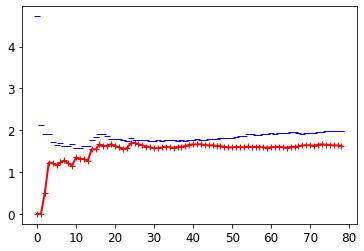

In [12]:
from sklearn.metrics import mean_squared_error       # import metric
from sklearn.model_selection import train_test_split # import training and testing set splitting
def plot_learning_curves(model, X, y):               # define the function that make the below plots
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)    # training and testing set splitting
    train_errors, val_errors = [], []                # data containers for plots
    for m in range(1, len(X_train)):                 # loop through the data for the points on the x-axis
        model.fit(X_train[:m], y_train[:m])          # train the model on the training data of the current size
        y_train_predict = model.predict(X_train[:m]) # make predictions with the trained set of the current size
        y_val_predict = model.predict(X_val)         # make predictions on the entire validation set
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m])) # judge predictions on training set
        val_errors.append(mean_squared_error(y_val_predict, y_val))           # judge predictions on validation set
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")        # plot training graph
    plt.plot(np.sqrt(val_errors), "b_", linewidth=3, label="val")             # plot validation graph
lin_reg = LinearRegression()                         # use a linear regressor
plot_learning_curves(lin_reg, X, y)                  # apply the above function => produce plots

Some remarks are due. For little training data, the algorithm can fit the data points perfectly, i.e., the error (y-axis) is zero for the training set. However, the poorly trained model performs terribly on the validation set. With more training instances, the model cannot fit perfectly anymore so the error increases. It reaches a plateau once the algorithm is sufficiently fitted: more data will not change the model significantly, anymore. For the validation set, the algorithm performs similarly and also reaches a plateau once the parameters do not change significantly, anymore. Usually, the algorithm performs a bit better on the training set than on the validation set as it is fitted to the training set.<br><br>
**Tip or suggestion**<br>
If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model or come up with better features.<br><br>
Now, let's try something that is likely to overfit the data: a 10th-degree polynomial.

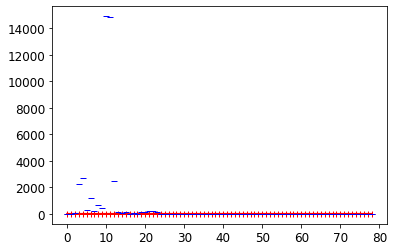

In [13]:
from sklearn.pipeline import Pipeline             # import Pipeline from sklearn
polynomial_regression = Pipeline((                # establish the model via the pipeline
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ))
plot_learning_curves(polynomial_regression, X, y) # call the function defined above; the model is a parameter of it

There are two major differences to the previous figure:
- The eror on the training set is much lower than for the underfitting model.
- There is a significant gap between the lines with the validation error being higher. This is the hallmark of overfitting. However, a (much) larger training set might bring the lines closer to each other.

**Tip or suggestion**<br>
One way to imporve an overfitting model is to feed it more training data until the validation error reaches the training error.<br><br>
**Excursion: The Bias7Variance Tradeoff**<br>
An important theoretical result of statistics and Machine Learning is the fact that a model's generalization error can be expressed as the sum of three very different errors:
- Bias
This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.
- Variance
This part is due to the model's excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance, and thus to overfit the training data.
- Irreducible error
This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).

Increasing a model's complexity will typically increase its variance and reduce its bias. Conversely, reducing a model's complexity increases its bias and reduces its variance. This is why it is called a tradeoff.
## Regularized Linear Models
page 127<br>
Overfitting can be countered with regularization, i.e., by constraining the weights of the model. This can be done by neglecting weights (or setting them to zero) or by establishing a "cost" for the adjustment of these weight. We will discuss Ridge Regression, Lasso Regression, and Elastic Net.<br>
Here, regularization is introduced in the context of linear models. However, regularization is not restricted to linear models. In fact, it can be applied to any model that is trained with a cost function by simply adding an additional cost that increases for larger fitting parameters. Bias terms are usually excluded from the regularization.
### Ridge Regression
This is also called *Tikhonov regularization* and is a regularized version of linear regression that adds a *regularization term* of the form $\alpha\sum_{i=1}^n\theta_i^2$ to the cost function. The regularization term should only be included during training but not when applying the trained model to make new predictions (test or all new). The hyperparameter $\alpha$ determines how strongly the model is regularized.<br><br>
**General note**<br>
It is quite common for the cost function used during training to be different from the perfromance measue used for testing. Apart from regularization, another reason why they might be different is that a good training cost function should have optimization-friendly derivatives, while the perfromrance measure used for testing should be as close as possible to the final objective.  A good example of this is a classifier trained using a cost function such as the log loss (discussed in a moment) but evaluated using precision/recall.<br><br>
The cost function for Ridge Regression is given by $J(\theta)=\text{MSE}(\theta)+\frac{\alpha}{2}\sum_{i=1}^n\theta_i^2$. Note that the bias term $\theta_0$ (offset on y-axis) is not regularized. The sum of squares can be rewritten as the squared norm of the vector of feature weights (without $\theta_0$).<br><br>
**Warning / caution**<br>
It is important to scale the data (e.g., using a *StandardScaler*) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.<br><br>
Larger $\alpha$ increases the bias and reduces the variance. Ridge regression can be applied to linear regression via the normal equation and via stochastic gradient descent. The formula corresponding to the normal equation is given by $\theta=(X^T\cdot X+\alpha A)^{-1}\cdot X^T\cdot y$. Now let's code Ridge Regression with Scikit-Learn using a closed-form solution (normal equation)!

In [14]:
# the next four lines are from the linked Github website above
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
# continue with code as in the book
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky") # https://en.wikipedia.org/wiki/Cholesky_decomposition#Example
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

And now the same for stochastic gradient descent.

In [15]:
sgd_reg = SGDRegressor(penalty="l2") # note the use of the L2-norm (see text between "General note" and ...
sgd_reg.fit(X, y.ravel())            # ... "Warning / caution" above), which identifies Rigde Regression
sgd_reg.predict([[1.5]])

array([1.46543286])

### Lasso Regression
page 130<br>
While Ridge regression uses the regularization term $\frac{\alpha}{2}\sum_{i=1}^n\theta_i^2$, Lasso Regression uses the regularization term $\alpha\sum_{i=1}^n|\theta_i|$. As a consequence, the total cost function turns from a smooth bowl (Ridge Regression) to a bowl with grooves / gutters that lead all the way down to the minimum (Lasso Regression). This is nicely illustrated in Fig. 4-19 on page 131. Following the gradient, the algorithm will hit such grooves and remain on them on its way to the minimum. As a consequence, the weights on the features corresponding to these grooves will be zero (or close to zero). So Lasso Regression disregards non-relevant features almost completely. This behavior is also hinted by the term *least absolute shrinkage and selection operator algorithm* (LASSO algorithm).<br><br>
**Tip or suggestion**<br>
On the Lasso cost functio, the BGD [batch gradient descent] path tends to bounce across the gutter [groove] toward the end. This is because the slope changes abruptly at $\theta_2=0$, You need to gradually reduce the learning rate in order to actually converge to the global minimum.<br><br>
The cost function of the Lasso Regression is not differentiable at $\theta_i=0$ (for any $i\in[1,n]$). But a useful gradient can still be obtained by subtituting the according gradient component with $sgn(\theta_i)$ and calculating the *subgradient* (default derivatives) on the remaining components. Now, let's code this!

In [16]:
from sklearn.linear_model import Lasso # here, we do not code ourselves but use a version from Scikit-Learn
lasso_reg = Lasso(alpha=0.1)           # set the hyperparameter \alpha
lasso_reg.fit(X, y)                    # train the model
lasso_reg.predict([[1.5]])             # make a prediction

array([1.53788174])

The prediction is close to the ones above for Ridge Regression (with the closed form and with stochastic gradient descent, respectively).
### Elastic Net
page 132<br>
Getting rid of irrelevant features is beneficial but not attainable with Ridge regression, so Lasso regression is very promising. However, it can behave erratically if the number of features is greater than the number of instances or when several features are strongly correlated. To handle this, one can use an Elastic Net, which is a mixture of Ridge and Lasso. By tuning its hyperparameter $r$, one can choose the weights of the Ridge and Lasso cost functions: the cost function of an Elastic Net is given by
$$J(\theta)=\text{MSE}(\theta)+r\alpha\sum_{i=1}^n|\theta_i|+\frac{1-r}{2}\sum_{i=1}^n\theta_i^2\,.$$
With Scikit-Learn, the code is as simple as follows.

In [17]:
from sklearn.linear_model import ElasticNet       # importing elastic net from Scikit-Learn
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # setting the hyperparameters \alpha and r in the formula above
elastic_net.fit(X, y)                             # training
elastic_net.predict([[1.5]])                       # inference

array([1.54333232])

### Early Stopping
page 133<br>
With more training, an algorithm initially becomes better on the validation set. But when training surpasses a certain threshold, overfitting sets in and performance on the validation set becomes worse. Early Stopping aborts training as soon as the cost function changes from going down to going up again. This kind of regularization technique works so well that Geoffrey Hinton, the "Godfather of AI", called it *beautiful free lunch*.<br><br>
**Tip or suggestion**<br>
With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better), then roll back the model parameters to the point where the validation error was at a minimum.<br><br>
Let's implement this!

In [18]:
# the next few lines are taken from the notebook on Github linked above
# in short, data is generated and split into training and validation sets
# then the data issent through a pipeline that generates polynomial features up to degree 90 and that applies ...
# standard scaling
from sklearn.preprocessing import StandardScaler
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)
# now, continue according to the book
from sklearn.base import clone   # this will allow to roll back to previous parameters
sgd_reg = SGDRegressor(max_iter=1000, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf") # initialize an infinite validation error
best_epoch = None                # container for best epoch
best_model = None                # container for best model
for epoch in range(1000):        # try a thousand epochs
    sgd_reg.fit(X_train_poly_scaled, y_train)            # see displayed text below
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)   # make prediction on validation set
    val_error = mean_squared_error(y_val_predict, y_val) # checking the error
    if val_error < minimum_val_error:                    # update the minimal validation error, the best epoch, ...
        minimum_val_error = val_error                    # ... and the best model
        best_epoch = epoch
        best_model = clone(sgd_reg)
best_epoch, best_model                                   # show results

(543,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1000,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=True))

Note that with *warm_start=True*, training via the *fit()*-method resumes where it stopped before instead of starting over!<br><br>
While we have introduced regularization for linear models, it can also be applied to other models. A model is regularized whenever fitted parameters are associated a penalty that is added to the cost function.
## Logistic Regression
page 134<br>
Sometimes referred to as *Logit Regression*, Logistic Regression is one of those regression algorithms that are used for classification. It yields an output between 0 and 1 that is interpreted as the probability that the according instance belongs to a given class. This makes it a binary classifier.
### Estimating Probabilities
page 134<br>
The output of some regression algorithm is mapped onto the interval [0, 1] via some function (that usually represents the integral of some probability distribution). Logistic Regression uses the *logistic* or *logit* function $p=h_{\theta}(x)=\sigma(\theta^T\cdot x)$, where the *sigmoid function* is the S-shaped function $\sigma(t)=(1+e^{-t})^{-1}$. Binary classification is obtained by applying a heaviside function to $p-\nu$, e.g., with $\nu=0.5$. Logistic Regression predicts the positive class for $p\geq0.5$ and the negative class for $p<0.5$.
### Training and Cost Function
page 135<br>
The cost function $c(\theta)$ should be large for wrong and small for correct predictions, i.e., $c(\theta)=-log(p)$ for $y=1$ (positive class => small cost for true positives, large cost for false negatives) and $c(\theta)=-log(1-p)$ for $y=0$ (negative class => large cost for false positives, small cost for true negatives). So the total cost on the entire training set with $m$ instances is given by
$$J(\theta)=-\frac{1}{m_i}\sum^m_{i=1}\left(y^{(i)}\text{log}(p^{(i)})-(1-y^{(i))})\text{log}(1-p^{(i)})\right)\,.$$
There is no closed-form equation like for the Normal Equation above. But gradient descent will still work fine. The gradient on the above cost function is
$$\frac{\partial}{\partial\theta_j}J(\theta)=\frac{1}{m}\sum_{i=1}^m\left(p^{(i)}-y^{(i)}\right)x_j^{(i)}\,,$$
where we have used $p^{(i)}=\sigma(\theta^T\cdot x^{(i)})$ and basic differentiation rules (confirmed on paper by hand, see "Gradients.pdf").

### Decision Boundaries
page 136<br>
We demonstrate Logistic Regression with the iris dataset that contains data on the petals (*Kronblätter*) and sepals (*Kelchblätter*) of 150 iris flowers. Each flower / instance belongs to one out of three species / classes. Here, we try to detect the species *Iris-Virginica*.

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


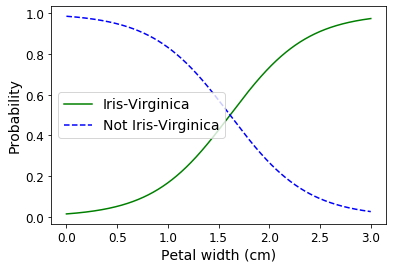

In [19]:
# get the data
from sklearn import datasets              # call datasets from sklearn
iris = datasets.load_iris()               # put data in a data container ("iris")
print(list(iris.keys()))                  # show what information is stored
X = iris["data"][:, 3:]                   # get the data on petals and sepals, but here, only the petal width
y = (iris["target"] == 2).astype(np.int)  # classify for "Iris-Virginica" (yes or no)
# train the classifier
from sklearn.linear_model import LogisticRegression # get the logistic regression
log_reg = LogisticRegression()                      # give it a handy name
log_reg.fit(X, y)                                   # train it
# infer probabilities for newly generated instances (petal widths); parts of code taken from Github link above
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)                    # new instances
y_proba = log_reg.predict_proba(X_new)                            # inference
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")      # show probability as function of petal width
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica") # probability of opposite class
plt.xlabel("Petal width (cm)", fontsize=14)                       # x-axis
plt.ylabel("Probability", fontsize=14)                            # y-axis
plt.legend(loc="center left", fontsize=14)                        # legend

Instead of asking for the probabilities via the *predict_proba()* method, one can also ask directly for the predicted class, using the *predict()* method.

In [20]:
log_reg.predict([[1.7], [1.5]]) # prediction on two instances yields two predictions

array([1, 0])

By default, Scikit-Learn adds some regularization via Ridge Regression (L2 penalty) to Logistic Regression.<br><br>
**General note**<br>
The hyperparameter controlling the regularization strength of a Scikit-Learn *LogisticRegression* model is not *alpha* (as in other linear models), but its inverse: *C*. The higher the value of *C*, the *less* the model is regularized.
### Softmax Regression
page 139<br>
Logistic Regression can be generalized for multiclass tasks (not multioutput tasks) via *Softmax Regression* or *Multinomial Logistic Regression*. Therefore, the algorithm is trained on a dataset with multiple classes where an individual parameter vector $\theta^{(k)}$ is attributed to class $k$. Given a new instance, class $k$ is associated the *softmax score* $s_k(x)=(\theta^{(k)})^T\cdot x$, where $x$ is the feature vector. The *softmax function*,
$$p_k=\frac{exp(s_k(x))}{\sum_{j=1}^Kexp(s_j(x))}\,,$$
yields the probability that this instance belongs to class $k$ (out of a total of $K$ classes). The classifier attributes the instance to that class with the highest probability. Note that the softmax score can be negative! The exponentals ensure that all probabilities are positive. And dividing by the sum of all exponentials yields an output between 0 and 1.<br><br>
**Tip or suggestion**<br>
The Softmax Regression classifier predicts only one class at a time (i.e., it is  multiclass, not multioutput) so it should be used only with mutually exclusive classes such as different types of plants. You cannot use it to recognize multiple people in one picture.<br><br>
A suitable cost function for Softmax Regression is the *cross entropy*,
$$J(\Theta)=-\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^Ky_k^{(i)}log(p_k^{(i)})\,,$$
where $\Theta$ is a matrix containing all parameter vectors $\theta_k$, $K$ is the number of classes, $m$ is the number of instances, and $y_k^{(i)}$ equals 1 if the instance $i$ belongs to the class $k$ and 0 otherwise. For $K=2$, the cross entropy equals the cost function $J(\theta)$ introduced above for Logistic Regression. For Gradient Descent, we require the gradient of the cost function. For the cross entropy cost function it is given by (see "Gradients.pdf")
$$\nabla_{\theta^{(k)}}J(\Theta)=\frac{1}{m}\sum_{i=1}^m\left(p_k^{(i)}-y_k^{(i)}\right)x^{(i)}\,.$$
**Cross Entropy**<br>
Cross entropy originated from information theory. Sppose you want to efficently trasmit information about theweather every day. If there are eight options (sunny, raingy, etc.), you could encode each option using 3 bits since $2^3=8$. However, if you think ti will be sunny almost every day, it would be much more efficient to codes "sunny" on just one bit (0) and the other seven options on 4 bits (starting with a 1). Cross entropy measures the average number of bits you actually send per option. If your assumption about the weather is perfect, cross entropy will just be equal to the entropy of the weather itself (i.e., its intrinsic unpredictability). But if your assumption s are wrong (e.g., if it rains often), cross entropy will be greater by an amount called the *Kullback-Leibler divergence*.<br>
The cross entropy between two probabilityy distributions $p$ and $q$ is defined as $H(p, q)=-\sum_xp(x)log(q(x))$ (at least when the distributions are discrete).<br><br>
Due to the different cost function, Softmax Regression is different from one-versus-all (OvA) Logistic Regression. Scikit-Learn would use OvA by default. But by setting the *multiclass* hyperparameter to "multinomial", we can ensure the use of Softmax Regression (see Scikit-Learn's documentation for details). Let's use Softmax Regression to classify the instances of the iris dataset into the three different species!

In [21]:
X = iris["data"][:, (2, 3)] # using petal length (2) and petal width (3)
y = iris["target"]          # is 0, 1, or 2 (corresponding to the species) by default
softmax_reg = LogisticRegression(multi_class="multinomial", # ensuring softmax, ...
                                 solver="lbfgs", C=10)      # ... specifying a "solver" (?), and the regularization
softmax_reg.fit(X, y)       # fitting to the data

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now, the classifier is trained and can be used to classify new instances. For an iris flower with 5cm long and 2cm wide petals, it predicts the following.

In [22]:
print(softmax_reg.predict([[5, 2]]))       # show classification
print(softmax_reg.predict_proba([[5, 2]])) # show probabilities

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


## Exercises
page 142
### 1.-11.
Solutions are shown in Appendix A of the book and in the separate notebook *ExercisesWithoutCode*.
### 12.
Implement Batch Gradient Descent with early stopping for Softmax Regression (withous Scikit-Learn).

In [23]:
# start by adding the bias term to the features (always 1 timex \theta_0)
X_with_bias = np.c_[np.ones([len(X), 1]), X]

Split the data in training and test sets without using Scikit-Learn.

In [24]:
test_ratio = 0.2                                          # 20% for testing
validation_ratio = 0.2                                    # 20% for validation
total_size = len(X_with_bias)                             # total number of instances
test_size = int(total_size * test_ratio)                  # specifying size of test set
validation_size = int(total_size * validation_ratio)      # specifying size of validation set
train_size = total_size - test_size - validation_size     # using the remaining data for training
rnd_indices = np.random.permutation(total_size)           # shuffle indices
X_train = X_with_bias[rnd_indices[:train_size]]           # training data
y_train = y[rnd_indices[:train_size]]                     # training labels
X_valid = X_with_bias[rnd_indices[train_size:-test_size]] # validation data
y_valid = y[rnd_indices[train_size:-test_size]]           # validation labels
X_test = X_with_bias[rnd_indices[-test_size:]]            # test data
y_test = y[rnd_indices[-test_size:]]                      # test labels

The algorithm shall yield probabilities for each class. To accomplish this we can train it on instances where these proababilities are given. So we need to transform the classes 0, 1, and 2 (corresponding to the three species) to probabilities, e.g., [0, 0, 1] for class 2. This is *one-hot-encoding*.

In [25]:
def to_one_hot(y):                       # define a function to do the job
    n_classes = y.max() + 1              # this should yield 3 (there are three classes), unless we are ...
                                         # ... unlucky with the splitting in training, test, and validation sets
    m = len(y)                           # number of instances
    Y_one_hot = np.zeros((m, n_classes)) # establish conatiner with default zeros
    Y_one_hot[np.arange(m), y] = 1       # set the column corresponding to the species to 1
    return Y_one_hot                     # return the result
print(y_train[:10])                      # try it on the first 10 instances of the training set
print(to_one_hot(y_train[:10]))          # it works

[2 1 2 2 0 0 2 2 0 1]
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


Do the *one-hot-encoding* for all sets. And define the softmax function (see text above). And the numbers of inputs and outputs.

In [26]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)
def softmax(logits): # logits represents the softmax score (the simple result obtained from linear regression)
    exps = np.exp(logits)                          # take the exponential
    exp_sums = np.sum(exps, axis=1, keepdims=True) # sum within one row, put the result in each column of this row
    return exps / exp_sums                         # return the ratio; it will be between 0 and 1
# determine the numbers of inputs and outputs
n_inputs = X_train.shape[1]         # 3 (petal length, petal width, and the bias term)
n_outputs = len(np.unique(y_train)) # 3 (in random order: iris virginica, iris versicolor, and iris setosa)

Here, we implement gradient descent via softmax regression. The gradient is calculated on the cross entropy cost function. The entire batch / training set is used. Early stopping will be added later.

In [27]:
eta = 0.01                                   # step size
n_iterations = 5001                          # number of fitting iterations
m = len(X_train)                             # number of training instances
epsilon = 1e-7                               # add this to probablities to avoid divergence for log(0)
Theta = np.random.randn(n_inputs, n_outputs) # initializing the 3x3 matrix Theta with random numbers
for iteration in range(n_iterations):        # loop through iteratios
    logits = X_train.dot(Theta)              # rows: training instances; columns: scores on the three classes
    Y_proba = softmax(logits)                # same as logits, but scores converted to probabilities
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1)) # value of cost function, see ...
                                             # ... text further above for the formula (cross entropy)
    error = Y_proba - Y_train_one_hot        # bracket in gradient formula (see text above); for all instances 
    if iteration % 500 == 0:                 # print the current iteration and the cost function (here: "loss") ...
        print(iteration, loss)               # ... every 500 iterations
    gradients = 1/m * X_train.T.dot(error)   # calculating the gradient vector of the cross entropy, see text ...
                                             # ... above; the gradient has 3 components (because of 3 parameters)
    Theta = Theta - eta * gradients          # go a step down in the cost function (aka "update Theta")

0 2.3693600795167478
500 0.8663269853311856
1000 0.691295587630911
1500 0.5911932043615786
2000 0.5295261038031163
2500 0.48781266475148305
3000 0.45728741551184304
3500 0.4335715711723563
4000 0.41430710655390646
4500 0.3981298868497954
5000 0.38419994097668625


The batch gradient descent has been carried out: the algorithm is trained (the parameters have been adjusted) and can now be used for inference on new instances, e.g., of the validation set.

In [28]:
print(Theta)                                   # fitted parameters
logits = X_valid.dot(Theta)                    # scores on instances of the validation set
Y_proba = softmax(logits)                      # transform scores to probabilities
y_predict = np.argmax(Y_proba, axis=1)         # take the column (class) with highest probability
accuracy_score = np.mean(y_predict == y_valid) # check accuracy by comparing prediction with validation label
print(accuracy_score)                          # print accuracy

[[ 3.67597907 -0.52819338 -2.35321129]
 [-0.0566527   1.6954763   1.03442327]
 [ 1.29161942  0.77129777  3.98292438]]
0.9


Now, we add some L2 penalty. The offset / bias term has to be excluded from this penalty. As can be seen from the L2 cost function for default Ridge Regression, the gradient of this cost function is simply $\alpha\theta$. This generalizes to Softmax Regression. In any case, however, the cost (and hence the gradient) on the bias terms shall be set to zero.

In [29]:
# parameters are the same as above
alpha = 0.1                                      # regularization hyperparameter
Theta = np.random.randn(n_inputs, n_outputs)     # redo random initialization
# same as above unless commented
for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1)) # only a different name
    l2_loss = 1/2 * np.sum(np.square(Theta[1:])) # include an L2 penalty for the second and third row of Theta
    loss = xentropy_loss + alpha * l2_loss       # total loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]] # see text above
    Theta = Theta - eta * gradients

0 5.462743474632974
500 0.9471249674257382
1000 0.7324650025970308
1500 0.645701751533531
2000 0.6044552366276194
2500 0.5812208532805319
3000 0.5661197013234697
3500 0.5552574272772628
4000 0.5469193670060655
4500 0.5402520519530375
5000 0.5347767243968085


Due to the regularization, the errors are larger than before. But the algorithm performs better with regularization!

In [30]:
# same as above
print(Theta)
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)
accuracy_score = np.mean(y_predict == y_valid)
print(accuracy_score)

[[ 2.9410926  -0.36925095 -2.61563935]
 [-0.80753667  0.27719638  0.55551934]
 [-0.40991112 -0.13109821  0.52964553]]
0.9333333333333333


To implement regularization, we only need to look at the error on the validation set and stop training once the cost function on the validation set changes from going down to going up. The entire cost function (including regularization) is used for the gradient descent. No cost function is considered for testing the performance on the test set once training (on the training and validation sets) is finished.

In [31]:
n_iterations = 500001                             # update the number of iterations
# other parameters are the same as above
best_loss = np.infty
Theta = np.random.randn(n_inputs, n_outputs)
# same as above unless commented
for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    # L2 loss and print command follows further below
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients
    # now, we have an updated Theta, apply it to the validation set, and calculate the loss
    logits = X_valid.dot(Theta)                                                           # uses the validation set
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1)) # uses the validation set
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    # print the loss, update best_loss and stop the algorithm if the loss goes up
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:                          # if the loss is lower than before ...
        best_loss = loss                          # ... update the best loss ...
    else:
        print(iteration - 1, best_loss)           # ... otherwise ...
        print(iteration, loss, "early stopping!") # ... print the current iteration and loss ...
        break                                     # ... and stop training

0 7.136661450635477
500 0.9475395286963446
1000 0.7400215831918291
1500 0.6552927389327922
2000 0.6125813511183302
2500 0.586655247255255
3000 0.5687096639217433
3500 0.5552277243201645
4000 0.5445808555032354
4500 0.5359010310301355
5000 0.528668932596903
5500 0.5225461218893984
6000 0.517298217336884
6500 0.5127556422606494
7000 0.5087916169246894
7500 0.5053088890002114
8000 0.5022312796361857
8500 0.4994980655615991
9000 0.4970601192820889
9500 0.49487718361588084
10000 0.49291590202815877
10500 0.49114836620837166
11000 0.48955102586107996
11500 0.4881038573197236
12000 0.4867897204661952
12500 0.4855938548943682
13000 0.4845034805669422
13500 0.48350747794818644
14000 0.4825961293322275
14500 0.48176090782537756
15000 0.48099430382399877
15500 0.48028968127776905
16000 0.47964115782287164
16500 0.47904350420074826
17000 0.4784920593763271
17500 0.47798265852605626
18000 0.47751157164478436
18500 0.4770754509672955
19000 0.4766712857481564
19500 0.47629636321651836
20000 0.4759482

160000 0.4705460120606671
160500 0.47054601065644475
161000 0.47054600930781404
161500 0.4705460080125742
162000 0.47054600676861125
162500 0.4705460055738955
163000 0.470546004426477
163500 0.4705460033244834
164000 0.47054600226611654
164500 0.4705460012496488
165000 0.4705460002734219
165500 0.47054599933584246
166000 0.4705459984353807
166500 0.4705459975705669
167000 0.47054599673998987
167500 0.4705459959422943
168000 0.4705459951761785
168500 0.4705459944403919
169000 0.4705459937337342
169500 0.47054599305505196
170000 0.470545992403238
170500 0.4705459917772282
171000 0.4705459911760014
171500 0.47054599059857605
172000 0.4705459900440101
172500 0.4705459895113987
173000 0.47054598899987243
173500 0.47054598850859686
174000 0.47054598803677006
174500 0.4705459875836223
175000 0.47054598714841367
175500 0.4705459867304346
176000 0.47054598632900246
176500 0.4705459859434624
177000 0.4705459855731853
177500 0.47054598521756685
178000 0.47054598487602683
178500 0.4705459845480076

The above algorithm can take long or short, depending on the random initialization. With early stopping, the result is even better!

In [32]:
# same as above
print(Theta)
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)
accuracy_score = np.mean(y_predict == y_valid)
print(accuracy_score)

[[ 4.91629615  1.15388443 -4.20136277]
 [-1.10367556  0.12239051  0.98128505]
 [-0.44627435 -0.1526877   0.59896204]]
1.0


Now, let's make predictions on the entire dataset!

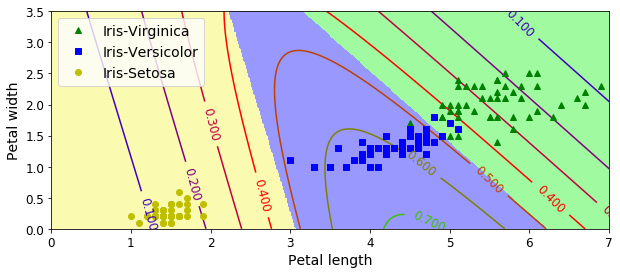

In [33]:
# establish a grid of instances for the contour plot
x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1), np.linspace(0, 3.5, 200).reshape(-1, 1),)
X_new = np.c_[x0.ravel(), x1.ravel()]                    # petal length and petal width
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new] # include constant values of 1 for bias terms
# softmax score, probabilities, prediction
logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)
# reshape probabilities and predictions
zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)
# plot the instances of the iris dataset
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")
# define colormap with 3 specified colors for the 3 classes
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
# make the contour plot based on the instances defined by the grid and the according predictions of the model
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

The accuracy of predictions on the test set is quite good but not perfect. This is probably because with only 150 instances, the overall dataset is rather small.

In [34]:
# same as above but for test set
print(Theta)
logits = X_test.dot(Theta)                    # test set
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)
accuracy_score = np.mean(y_predict == y_test) # test set
print(accuracy_score)

[[ 4.91629615  1.15388443 -4.20136277]
 [-1.10367556  0.12239051  0.98128505]
 [-0.44627435 -0.1526877   0.59896204]]
0.9
